# Autore: Federico Marra
# Matricola: 7025997
# Mail: [federico.marra@edu.unifi.it](mailto:federico.marra@edu.unifi.it)
# [Link al GitHub](https://github.com/federicomarra/asd-lab)

## Esercizio 2 Laboratorio di Algoritmi

#### Notebook per confronto tra gli algoritmi di ordinamento Insertion-Sort e Quick-Sort
Per fare questo dovremo scrivere un notebook Jupyter che permetta di confrontare i due algoritmi verificando vantaggi e svantaggi degli algoritmi:
1. vengono generati i dati di test (esecuzioni diverse devono generare dati diversi)
2. vengono eseguiti i test e generati i risultati
3. la documentazione del codice e la descrizione degli esperimenti devono essere in Markdown all’interno del notebook stesso

## Indice
1. [Introduzione](#Introduzione)
2. [Algoritmi di ordinamento](#Algoritmi-di-ordinamento)
   - [Insertion-Sort](#Insertion-sort)
       1. [Complessità](#Complessità)
       2. [Correttezza](#Correttezza)
       3. [Stabilità](#Stabilità)
   - [Quick-Sort](#Quick-sort)
       1. [Complessità](#Complessità-i)
       2. [Correttezza](#Correttezza-i)
       3. [Stabilità](#Stabilità-i)
3. [Test](#Test)
    - [Librerie utilizzate](#Librerie-utilizzate)
    - [Esecuzione dei test](#Esecuzione-dei-test)
4. [Generazione delle tabelle dei tempi di esecuzione](#Generazione-delle-tabelle-dei-tempi-di-esecuzione)
5. [Generazione dei grafici](#Generazione-dei-grafici)
6. [Osservazioni finali](#Osservazioni-finali)
   - [Caso peggiore: valori ordinati inversamente](#Caso-peggiore:-valori-ordinati-inversamente)
   - [Caso medio: valori casuali)](#Caso-medio:-valori-casuali)
   - [Caso migliore: valori già ordinati correttamente](#Caso-migliore:-valori-già-ordinati-correttamente)
7. [Ulteriori osservazioni e conclusioni](#Ulteriori-osservazioni-e-conclusioni)
8. [Bibliografia](#Bibliografia)

# Introduzione
Questo notebook è stato creato per confrontare le prestazioni degli algoritmi di ordinamento Insertion-Sort e Quick-Sort.
L'obiettivo principale è la comprensione delle differenze di prestazione tra i due algoritmi, in particolare in base alla dimensione dell'array su cui vengono eseguiti e dal tipo di array, ovvero se rappresenta il caso peggiore, medio o migliore.
Per l'esecuzione dei test e del rendering grafico dei risultati verranno utilizzate le librerie Matplotlib e Random:
- **matplotlib**: usato per generare grafici e tabelle in modo tale di analizzare visivamente le prestazioni dei due algoritmi
- **random**: usato per generare grafici e tabelle in modo tale di analizzare visivamente le prestazioni dei due algoritmi

# Algoritmi di ordinamento


## Insertion-Sort

![](https://upload.wikimedia.org/wikipedia/commons/2/24/Sorting_insertion_sort_anim.gif)

In [44]:
def insertion_sort(array):
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i + 1] = array[i]
            i = i - 1
        array[i + 1] = key
    return array

### Complessità
La complessità dell'algoritmo di Insertion-Sort è pari a $O(n^2)$, dove $n$ è la dimensione dell'array su cui viene eseguito.
### Correttezza
L'algoritmo di Insertion-Sort è corretto in quanto:
- **Inizializzazione**: all'inizio di ogni iterazione del ciclo for, l'array $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$.
- **Mantenimento**: ogni iterazione del ciclo for mantiene l'invariante di ciclo. Se $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$, allora il ciclo while trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione.
- **Terminazione**: quando il ciclo for termina, $j = n + 1$. Per l'invariante di ciclo, questo implica che $A[1..n]$ è ordinato e contiene gli stessi elementi di $A[1..n]$, ovvero l'array è ordinato correttamente.
- **Correttezza**: l'algoritmo è corretto in quanto l'inizializzazione, il mantenimento e la terminazione sono verificate.
- **Complessità**: l'algoritmo ha complessità $O(n^2)$, dove $n$ è la dimensione dell'array su cui viene eseguito.
- **Stabilità**: l'algoritmo è stabile in quanto gli elementi uguali non vengono scambiati di posizione.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Online**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Online**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.

### Stabilità
L'algoritmo di Insertion-Sort è stabile in quanto gli elementi uguali non vengono scambiati di posizione.

## Quick-Sort
![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)

In [45]:
def quick_sort(array, p, r):
    if p < r:
        q = partition(array, p, r)
        quick_sort(array, p, q - 1)
        quick_sort(array, q + 1, r)
    return array

def partition(array, p, r):
    x = array[r]
    i = p - 1
    for j in range(p, r):
        if array[j] <= x:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[r] = array[r], array[i + 1]
    return i + 1

### Complessità
La complessità dell'algoritmo di Quick-Sort è pari a $O(n^2)$ nel caso peggiore, $O(n \log n)$ nel caso medio e $O(n \log n)$ nel caso migliore, dove $n$ è la dimensione dell'array su cui viene eseguito.
### Correttezza
L'algoritmo di Quick-Sort è corretto in quanto:
- **Inizializzazione**: all'inizio di ogni iterazione del ciclo for, l'array $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$.
- **Mantenimento**: ogni iterazione del ciclo for mantiene l'invariante di ciclo. Se $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$, allora il ciclo while trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione.
- **Terminazione**: quando il ciclo for termina, $j = n + 1$. Per l'invariante di ciclo, questo implica che $A[1..n]$ è ordinato e contiene gli stessi elementi di $A[1..n]$, ovvero l'array è ordinato correttamente.
- **Correttezza**: l'algoritmo è corretto in quanto l'inizializzazione, il mantenimento e la terminazione sono verificate.
- **Complessità**: l'algoritmo ha complessità $O(n^2)$, dove $n$ è la dimensione dell'array su cui viene eseguito.
- **Stabilità**: l'algoritmo è stabile in quanto gli elementi uguali non vengono scambiati di posizione.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Online**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.

# Test

In [46]:
# Necessito dell'importazione della libreria random per la randomizzazione dei valori
from random import randint as rand

#Valore minimo che può essere inserito nell'array
minValue = 1

# Funzioni per la generazione degli array:

# Caso medio: array random
def randomArray(n):
    return [rand(minValue, n) for _ in range(n)]

# Caso migliore: array ordinato
def sortedArray(n):
    return list(range(minValue, n + 1, 1))

# Caso peggiore: array ordinato inversamente
def reversedArray(n):
    return list(range(n, minValue-1, -1))

In [47]:
# Stampa dell'array con la sua dimensione
def printArray(array, t):
    type = t == 0 and "caso medio" or t == 1 and "caso migliore" or t == 2 and "caso peggiore" or t == 3 and "ordinato da insertion sort" or t == 4 and "ordinato da quick sort"# if-else in-line
    print(f"Array", type, f"di dimensione {len(array)}:\n", array)

In [57]:
# Generazione degli array per i test
step, nTests = 50, 50
#step, nTests = 10, 250
#step, nTests = 100, 25
AverageArrays = []
BestArrays = []
WorstArrays = []
for i in range(step, step * (nTests + 1), step):
    AverageArrays.append(randomArray(i))
    BestArrays.append(sortedArray(i))
    WorstArrays.append(reversedArray(i))

In [59]:
# Necessito dell'importazione della libreria time per la misurazione dei tempi di esecuzione
from timeit import default_timer as timer
def test(array):
    timesInsertion = []
    timesQuick = []
    
    for i in range(len(array)):
        print(f"\nTest {i + 1}: dimensione = {len(array[i])}")
        
        start = timer()
        insertion_sort(array[i])
        end = timer()
        timesInsertion.append(end - start)
        print(f"Insertion sort: {timesInsertion[i]} s")
        
        start = timer()
        quick_sort(array[i], 0, len(array[i]) - 1)
        end = timer()
        timesQuick.append(end - start)
        print(f"Quick sort: {timesQuick[i]} s")
        
    return timesInsertion, timesQuick

###Esecuzione dei test

In [61]:
# Caso medio
print("\nCaso medio:")
AverageTimesInsertion, AverageTimesQuick = test(AverageArrays)
# Caso migliore
print("\n\nCaso migliore:")
BestTimesInsertion, BestTimesQuick = test(BestArrays)
# Caso peggiore
print("\n\nCaso peggiore:")
WorstTimesInsertion, WorstTimesQuick = test(WorstArrays)


Caso medio:

Test 1: dimensione = 50
Insertion sort: 1.746300040394999e-05 s
Quick sort: 0.00037004899968451355 s

Test 2: dimensione = 100
Insertion sort: 2.7935999241890386e-05 s
Quick sort: 0.0015358620003098622 s

Test 3: dimensione = 150
Insertion sort: 4.21839995397022e-05 s
Quick sort: 0.002964463999887812 s

Test 4: dimensione = 200
Insertion sort: 5.314900045050308e-05 s
Quick sort: 0.006317010000202572 s

Test 5: dimensione = 250
Insertion sort: 6.50570000289008e-05 s
Quick sort: 0.009196476999932202 s

Test 6: dimensione = 300
Insertion sort: 7.855200055928435e-05 s
Quick sort: 0.014191682001182926 s

Test 7: dimensione = 350
Insertion sort: 0.0001072389986802591 s
Quick sort: 0.020090521000383887 s

Test 8: dimensione = 400
Insertion sort: 0.00012567500016302802 s
Quick sort: 0.04019365500062122 s

Test 9: dimensione = 450
Insertion sort: 0.00021476000074471813 s
Quick sort: 0.041494245000649244 s

Test 10: dimensione = 500
Insertion sort: 0.0001817070005927235 s
Quick sor

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Prende in input una lista di colonne di dati, una tupla di intestazioni e un titolo 
def drawTable(data, headers, title):
    fig, ax = plt.subplots(figsize=(8, 11))
    plt.title(title)


# Unisci le liste di dati come colonne al fine di creare un array bidimensionale di dati: 'data'
    data = np.stack(tuple(data), axis=1)

    # Stile tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(data))))
    table.scale(1, 1.5)

    cell_colors = {
        cell: ("#c1d6ff", {"weight": "bold"})
        if table[cell].get_text().get_text() in headers
        else ("#deebff", {})
        for cell in table._cells
        if cell[0] % 2 == 0
    }
    for cell, (color, text_props) in cell_colors.items():
        # imposta il colore della cella
        table[cell].set_facecolor(color)
        # imposta le proprietà del testo della cella
        table[cell].set_text_props(**text_props)
        
    plt.show()
    
    

# Generazione delle tabelle dei tempi di esecuzione

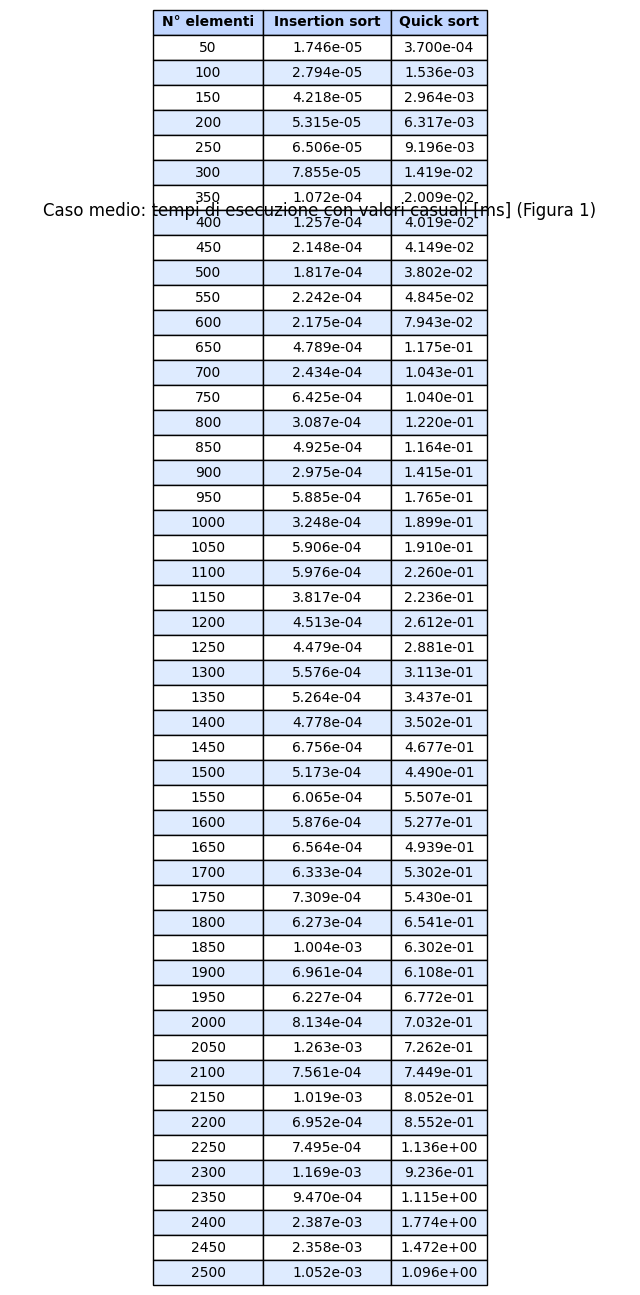

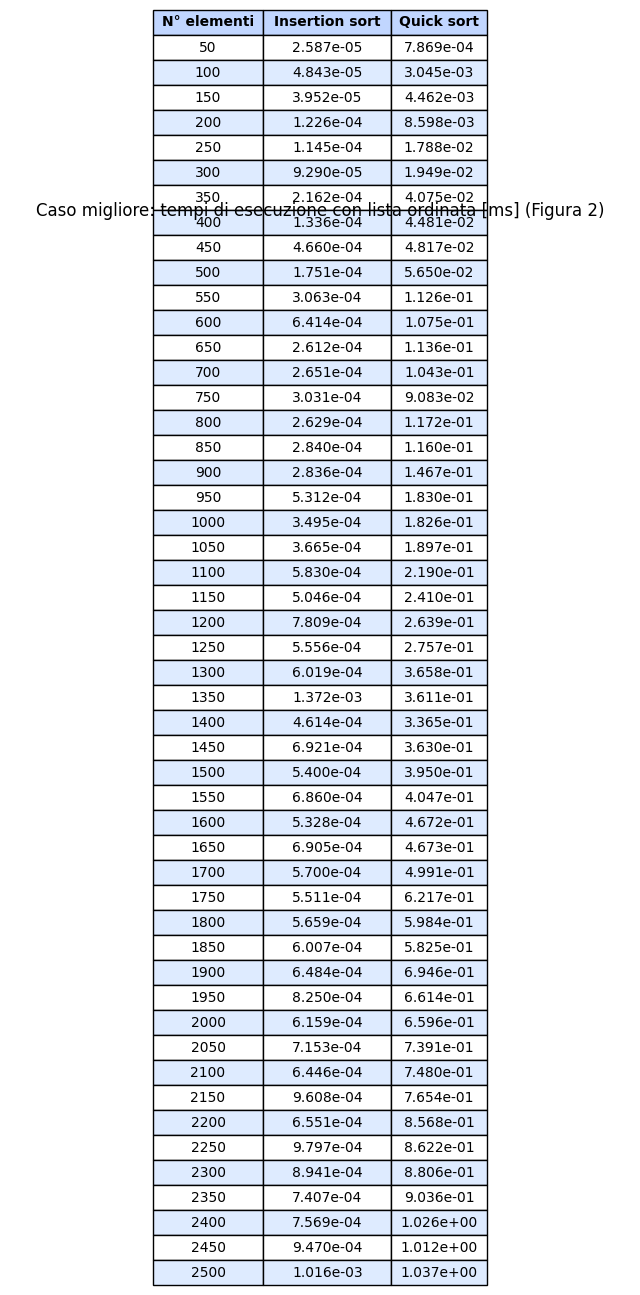

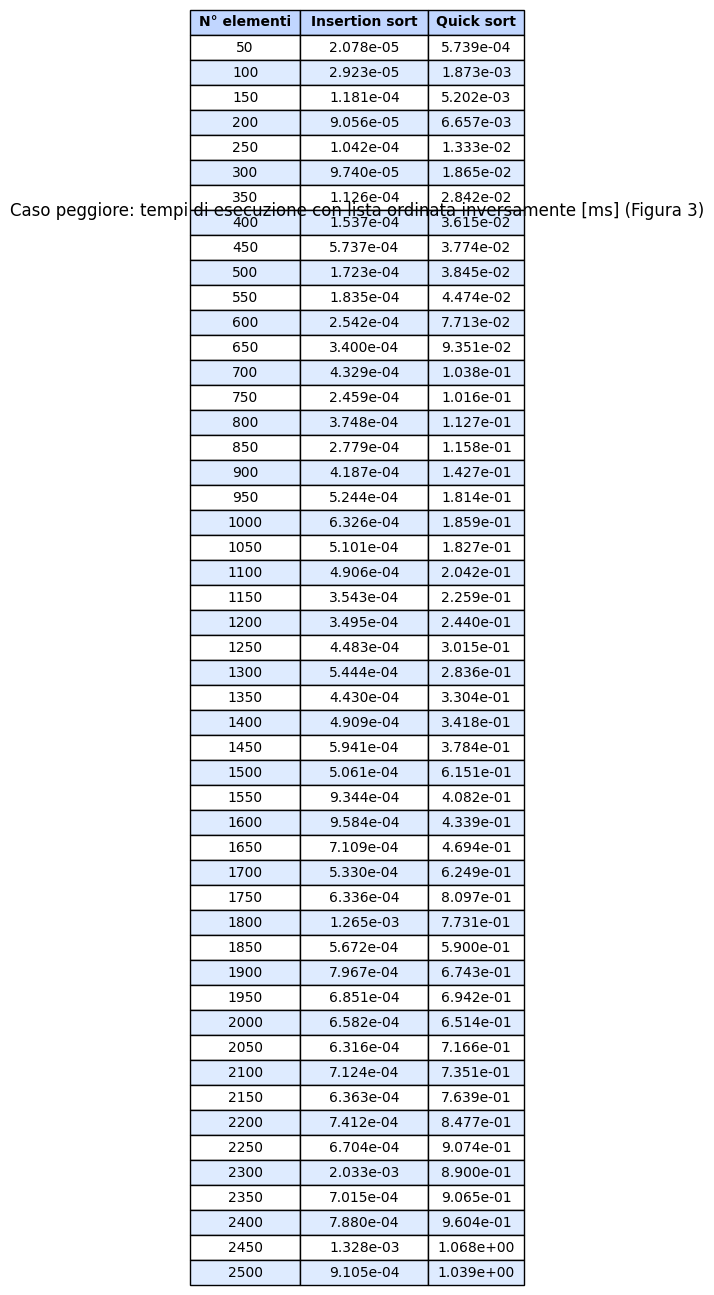

In [68]:
# Intestazioni delle tabelle
Headers = ("N° elementi", "Insertion sort", "Quick sort")


# Generazione tabella tempi caso medio
AverageData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in AverageTimesInsertion],
    ["{:.3e}".format(val) for val in AverageTimesQuick]
]
AverageTitle = "Caso medio: tempi di esecuzione con valori casuali [ms] (Figura 1)"

drawTable(AverageData, Headers, AverageTitle)


# Generazione tabella tempi caso migliore
BestData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in BestTimesInsertion],
    ["{:.3e}".format(val) for val in BestTimesQuick]
]
BestTitle = "Caso migliore: tempi di esecuzione con lista ordinata [ms] (Figura 2)"

drawTable(BestData, Headers, BestTitle)


# Generazione tabella tempi caso peggiore
WorstData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in WorstTimesInsertion],
    ["{:.3e}".format(val) for val in WorstTimesQuick]
]
WorstTitle = "Caso peggiore: tempi di esecuzione con lista ordinata inversamente [ms] (Figura 3)"

drawTable(WorstData, Headers, WorstTitle)

In [52]:
import pickle as pk

favorite_color = {"lion": "yellow", "kitty": "red"}
pk.dump(favorite_color, open("save.p", "wb"))

In [53]:
from timeit import default_timer as timer
a = 1
b = 10
str = ", "
start = timer()
for i in range(a, b):
    if i == b - 1:
        str = '\n'
    print(i, end=str)
end = timer()
print((end - start) * 1000, "ms")

1, 2, 3, 4, 5, 6, 7, 8, 9
0.2591819993540412 ms
